# imports


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
import seaborn.objects as so

import plotly.express as px
import plotly.io as pio

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('apartments_pl_2023_08.csv')

In [4]:
data_clean = data.drop(['floorCount','buildYear','type','poiCount','schoolDistance',
                 'clinicDistance','postOfficeDistance','kindergartenDistance',
                 'restaurantDistance','collegeDistance','pharmacyDistance',
                 'hasParkingSpace','hasBalcony','hasElevator','hasSecurity','hasStorageRoom','buildingMaterial'],axis=1)
data_clean.sample(5)

,id,city,squareMeters,rooms,floor,latitude,longitude,centreDistance,ownership,condition,price
3577,92c06b6583dcee47a75ec65cf3d03e2f,krakow,34.73,1.00,10.00,50.01,19.98,5.62,condominium,NaN,465000
5441,ec4926d9ad0ee96acb30b23da2a0cd56,gdansk,49.50,2.00,NaN,54.42,18.58,9.09,condominium,NaN,550000
12354,1708a487ab5d096b256907f3da3544c6,czestochowa,48.22,2.00,4.00,50.78,19.16,4.35,condominium,NaN,239000
12206,4d354833048c7367fc4b1be97aba98f8,lublin,101.60,4.00,3.00,51.23,22.54,2.90,condominium,premium,910000
10129,000acf1d14adba1b21c0970555514a18,lodz,53.00,3.00,3.00,51.74,19.40,5.44,condominium,NaN,460000


In [5]:
krakow_data = data_clean.query('city == "krakow"')

In [6]:
warszawa_data = data_clean.query('city == "warszawa"')

# How depends squareMeters to price in Krakow

In [7]:
price_to_meters_krk = krakow_data[['price', 'squareMeters']]
maxSquare =  price_to_meters_krk.squareMeters.max()
maxPrice = price_to_meters_krk.price.max()
minPrice = price_to_meters_krk.price.min()
minSquare = price_to_meters_krk.squareMeters.min()

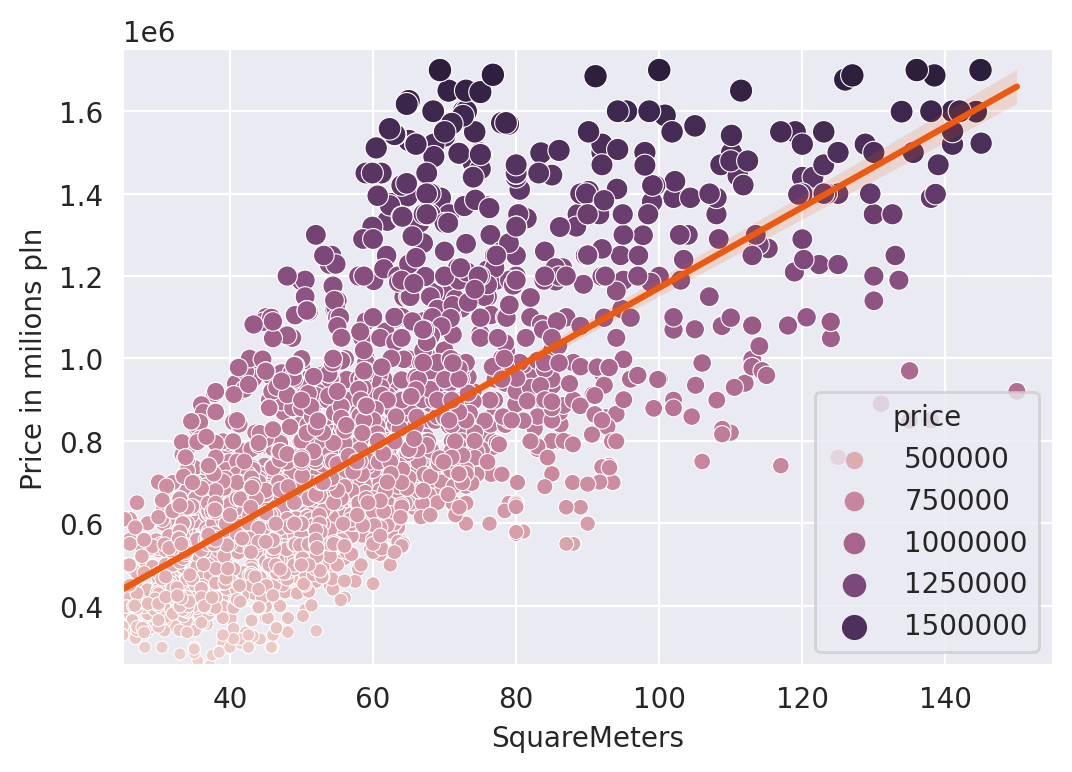

In [8]:
plt.figure(figsize=(6,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=price_to_meters_krk,
                       x='squareMeters', 
                       y='price',
                       hue='price',
                       size='price')
    sns.regplot(data=price_to_meters_krk, 
            x='squareMeters', 
            y='price',
            scatter = False,
            line_kws = {'color': '#ED590E'})
    
    ax.set(ylim=(minPrice, maxPrice + 50000),
        xlim=(minSquare, maxSquare + 5),
        ylabel='Price in milions pln',
        xlabel='SquareMeters')
# plt.savefig('krakow.png')

In [ ]:
fig = px.scatter(price_to_meters_warszawa, x='squareMeters', y='price', color='price',
                 trendline='ols', labels={'squareMeters': 'Square Meters', 'price': 'Price'},
                 title='Interactive Scatter Plot')

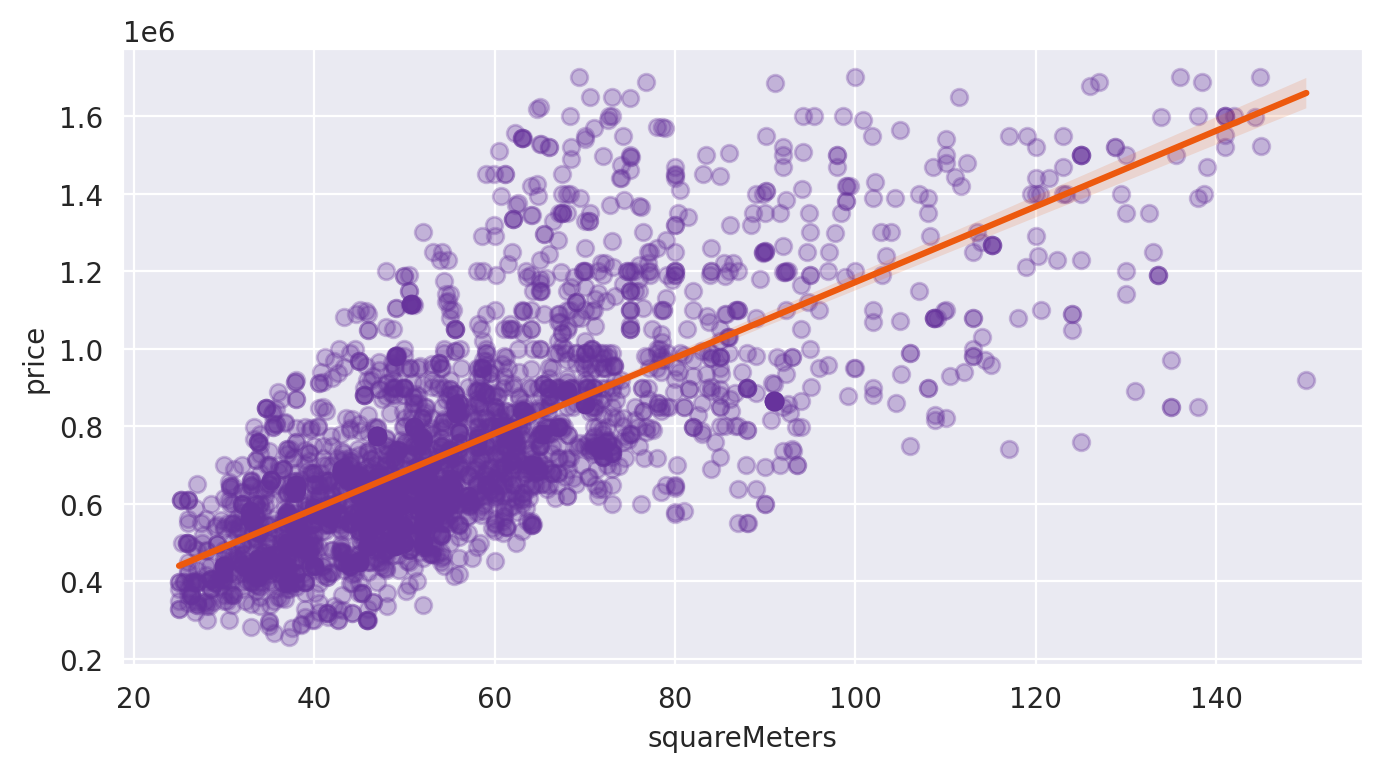

In [9]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  sns.regplot(data=price_to_meters_krk, 
            x='squareMeters', 
            y='price',
            color='#67339C',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': '#ED590E'})

In [10]:
regression = LinearRegression()


X = pd.DataFrame(price_to_meters_krk, columns=['squareMeters'])
y = pd.DataFrame(price_to_meters_krk, columns=['price'])

regression.fit(X, y)

print(f"Regression intercept: {regression.intercept_}\n"
      f"Regression coefficient: {regression.coef_}\n"
      f"Regression r-squared: {regression.score(X, y)}")

Regression intercept: [195877.24275013]
Regression coefficient: [[9760.48459827]]
Regression r-squared: 0.5231301770670003


In [21]:
price_to_meters_krk.describe()

,price,squareMeters
count,"2,983.00","2,983.00"
mean,"747,664.17",56.53
std,"278,454.10",20.63
min,"255,000.00",25.00
25%,"550,000.00",42.97
50%,"680,000.00",52.00
75%,"880,000.00",65.69
max,"1,700,000.00",150.00


In [40]:
fig = px.scatter(price_to_meters_krk, x='squareMeters', y='price', color='price',
                 trendline='ols', labels={'squareMeters': 'Square Meters', 'price': 'Price'},
                 title='Interactive Scatter Plot',
                 color_continuous_scale='Portland')
# pio.write_html(fig, file='interactive_scatter_plot_krk.html')

In [39]:
fig

# How depends squareMeters to price in Warszawa

In [11]:
price_to_meters_warszawa = warszawa_data[['price', 'squareMeters']]
maxSquareW = price_to_meters_warszawa.squareMeters.max()
maxPriceW = price_to_meters_warszawa.price.max()
minPriceW = price_to_meters_warszawa.price.min()
minSquareW = price_to_meters_warszawa.squareMeters.min()

In [20]:
price_to_meters_warszawa.describe()

,price,squareMeters
count,"5,471.00","5,471.00"
mean,"919,840.33",60.86
std,"407,434.61",22.80
min,"327,635.00",25.00
25%,"630,000.00",45.02
50%,"799,000.00",56.60
75%,"1,100,000.00",72.31
max,"2,500,000.00",150.00


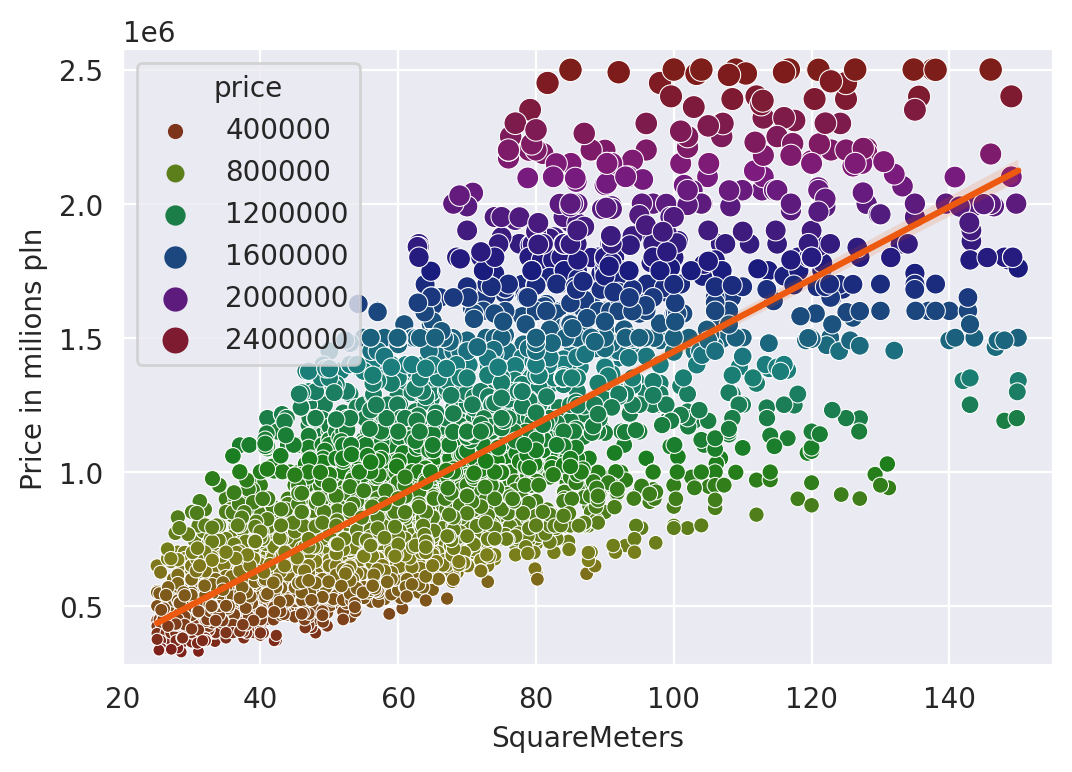

In [12]:
sns.dark_palette("seagreen")
plt.figure(figsize=(6,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=price_to_meters_warszawa,
                       x='squareMeters', 
                       y='price',
                       hue='price',
                       size='price',
                        palette = sns.hls_palette(l=.3, as_cmap=True))
    
    sns.regplot(data = price_to_meters_warszawa, x='squareMeters', y='price', scatter=False, ax=ax, line_kws = {'color': '#ED590E'})
    
    ax.set(ylim=(minPriceW - 50000, maxPriceW + 75000),
        xlim=(minSquareW - 5, maxSquareW + 5),
        ylabel='Price in milions pln',
        xlabel='SquareMeters')

# plt.savefig('warszawa.png')

In [18]:
regression = LinearRegression()


X = pd.DataFrame(price_to_meters_warszawa, columns=['squareMeters'])
y = pd.DataFrame(price_to_meters_warszawa, columns=['price'])

regression.fit(X, y)

print(f"Regression intercept: {regression.intercept_}\n"
      f"Regression coefficient: {regression.coef_}\n"
      f"Regression r-squared: {regression.score(X, y)}")

Regression intercept: [98156.0821232]
Regression coefficient: [[13501.23623241]]
Regression r-squared: 0.5707393232623927


In [22]:
fig = px.scatter(price_to_meters_warszawa, x='squareMeters', y='price', color='price',
                 trendline='ols', labels={'squareMeters': 'Square Meters', 'price': 'Price'},
                 title='Interactive Scatter Plot')
pio.write_html(fig, file='interactive_scatter_plot_warszawa.html')

In [23]:
fig